# Example State Machine Usage

## Hierarchical State Machine

Demonstrating use of the CompositeState class.

In [21]:
from state_machine import StateMachine, State, Event, CompositeState, PseudoState, display_machine
import state_machine.diagrams as diagrams

In [22]:
from state_machine import Event, State, StateMachine, CompositeState, FinalState
from mock import MagicMock

chatbot = StateMachine('chatbot')
active_state = chatbot.create_state('active', CompositeState)
sleeping_state = chatbot.create_state('sleeping', State)
final_state = chatbot.create_state('final', FinalState)

chatbot.initial_state=active_state
active_state.add_transition_to(sleeping_state, 'sunset')
active_state.add_transition_to(final_state, 'bandwidth exceeded')

sleeping_state.add_transition_to(active_state, 'sunrise')
sleeping_state.add_transition_to(final_state, 'power off')

INFO:default:Creating state of type <class 'state_machine.composite_state.CompositeState'>
INFO:default:Creating state of type <class 'state_machine.state.State'>
INFO:default:Creating state of type <class 'state_machine.state.FinalState'>


In [23]:
def become_happy( event, state ):
    state.logger.info('Becoming Happy')
    
def happy_message(event, state):
    if event.name=='msg':
        state.logger.info('Hello %s, I am happy', event.payload['from'])
    
def become_sad(event, state):
    state.logger.info('Becoming Sad')
    
def sad_message(event, state):
    if event.name=='msg':
        state.logger.info('Hello %s, I am sad', event.payload['from'])
        
def sun_is_shining(event, state):
    return True

def clouds_are_looming(event, state):
    return True

def do_happy_dance(event, state):
    return True

def hang_head_in_shame(event, state):
    return True

happy_state = active_state.create_state('happy')
happy_state.on_start = become_happy
happy_state.on_run   = happy_message

sad_state = active_state.create_state('sad')
sad_state.on_start = become_sad
sad_state.on_run = sad_message

check_weather = active_state.create_state('check weather', PseudoState)
check_weather.add_transition_to(happy_state, guard=sun_is_shining)
check_weather.add_transition_to(sad_state, guard=clouds_are_looming)

final_state = active_state.create_state( 'depressed', FinalState )

happy_state.add_transition_to(sad_state, 'criticism', guard=clouds_are_looming, action=hang_head_in_shame)
sad_state.add_transition_to(happy_state, 'praise', guard=sun_is_shining, action=do_happy_dance)
sad_state.add_transition_to(final_state, 'excessive criticism')

active_state.initial_state=check_weather
active_state.initialise()

sunrise=Event('sunrise')
sunset=Event('sunset')

hello = Event('msg',{'from':'Bernie'})

criticism=Event('criticism')
praise=Event('praise')

INFO:default:Creating state of type <class 'state_machine.state.State'>
INFO:default:Creating state of type <class 'state_machine.state.State'>
INFO:default:Creating state of type <class 'state_machine.state.PseudoState'>
INFO:default:Creating state of type <class 'state_machine.state.FinalState'>


Drawing active as a composite
tail for State:active is cluster_active


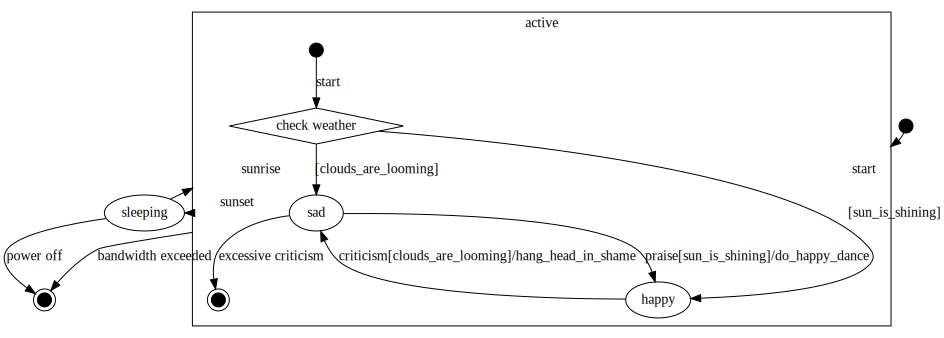

In [24]:
display_machine(chatbot)

On sunset, the chat bot goes to sleep, so criticism and praise have no affect on it.

In [25]:
chatbot.initialise()

# Send the bot to sleep
chatbot.notify(sunset)

#It is unresponsive
chatbot.notify(criticism)
chatbot.notify(hello)
chatbot.notify(praise)
chatbot.notify(hello)

INFO:default:active transitioning to state State:happy
INFO:default:Becoming Happy
INFO:default:active transitioning to state State:sad
INFO:default:Becoming Sad
INFO:default:Hello Bernie, I am sad
INFO:default:active transitioning to state State:happy
INFO:default:Becoming Happy
INFO:default:Hello Bernie, I am happy


On sunrise, the chatbot wakes. so criticism or praise change the internal state.

In [26]:
# Wake up the chat bot
chatbot.notify(sunrise)

# It is responsive
chatbot.notify(criticism)
chatbot.notify(hello)
chatbot.notify(praise)
chatbot.notify(hello)

INFO:default:active transitioning to state State:sad
INFO:default:Becoming Sad
INFO:default:Hello Bernie, I am sad
INFO:default:active transitioning to state State:happy
INFO:default:Becoming Happy
INFO:default:Hello Bernie, I am happy
